## Setup

In [14]:
# make the current working directory the project root directory
import os
PROJECT_ROOT_DIRECTORY = 'senior_project'
while os.path.basename(os.getcwd()) != PROJECT_ROOT_DIRECTORY:
    os.chdir(os.pardir)
print('Current working directory:', os.getcwd())

Current working directory: c:\Users\pavan\Desktop\senior_project


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from stable_baselines3 import DQN
from stable_baselines3.common.env_util import make_vec_env
from environments.discrete_env_v1 import PortfolioManagementEnv

## Data and Environment

In [16]:
train_df = pd.read_csv('data\dow_10_returns_train.csv', index_col=0, parse_dates=True)
train_df.head()

RF_RETURN  AXP_RETURN  AAPL_RETURN  BA_RETURN  GS_RETURN  \
2010-01-04   0.000150    0.000000     0.000000   0.000000   0.000000   
2010-01-05   0.000146   -0.002199     0.001729   0.032752   0.017680   
2010-01-06   0.000148    0.016165    -0.015906   0.030334  -0.010674   
2010-01-07   0.000149    0.016219    -0.001849   0.040482   0.019568   
2010-01-08   0.000148   -0.000715     0.006649  -0.009646  -0.018911   

            INTC_RETURN  JNJ_RETURN  KO_RETURN  NKE_RETURN  PG_RETURN  \
2010-01-04     0.000000    0.000000   0.000000    0.000000   0.000000   
2010-01-05    -0.000479   -0.011595  -0.012097    0.003979   0.000327   
2010-01-06    -0.003354    0.008133  -0.000355   -0.006097  -0.004743   
2010-01-07    -0.009615   -0.007137  -0.002485    0.009815  -0.005423   
2010-01-08     0.011165    0.003439  -0.018509   -0.001975  -0.001322   

            DIS_RETURN  
2010-01-04    0.000000  
2010-01-05   -0.002494  
2010-01-06   -0.005314  
2010-01-07    0.000314  
2010-01-08    0.001571

In [17]:
TICKERS = ['AXP', 'AAPL', 'BA', 'GS', 'INTC', 'JNJ', 'KO', 'NKE', 'PG', 'DIS']
RETURN_COLS = ['RF_RETURN'] + [f'{ticker}_RETURN' for ticker in TICKERS]
FEATURE_COLS = RETURN_COLS

In [40]:
train_env = PortfolioManagementEnv(
    train_df, 
    RETURN_COLS, 
    FEATURE_COLS, 
    window_size = 10,
    episode_length = 90
)

## Files and Folders

<span style="color:red">**(RUN ONCE)**</span>

In [18]:
experiment_id = 'EXPERIMENT_2_1678378331'
# experiment_id = f'EXPERIMENT_2_{int(time.time())}'
print(experiment_id)

EXPERIMENT_2_1678378331


In [7]:
models_dir = f'experiments/models/{experiment_id}'
log_dir = f'experiments/logs'

if not os.path.exists(models_dir):
    os.makedirs(models_dir)

if not os.path.exists(log_dir):
    os.makedirs(log_dir)

## Train Model

<span style="color:red">**(RUN ONCE)**</span>

In [8]:
# model = DQN(
#     'MlpPolicy', 
#     train_env, 
#     verbose = 1, 
#     learning_rate = 0.0002,
#     batch_size = 64,
#     exploration_fraction=0.5,
#     tensorboard_log = log_dir
# )

# TIMESTEPS = 10_000 # Number of timesteps between saves
# for i in range(1,300):
#     model.learn(total_timesteps=TIMESTEPS, reset_num_timesteps=False, tb_log_name=experiment_id)
#     model.save(f'{models_dir}/{TIMESTEPS*i}')

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to experiments/logs\EXPERIMENT_2_1678378331_0
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 90       |
|    ep_rew_mean      | 0.0424   |
|    exploration_rate | 0.932    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 11429    |
|    time_elapsed     | 0        |
|    total_timesteps  | 360      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 90       |
|    ep_rew_mean      | 0.0477   |
|    exploration_rate | 0.863    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 11178    |
|    time_elapsed     | 0        |
|    total_timesteps  | 720      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len

## Evaluate Performance

In [28]:
# 650_000 --> Just invests in AAPL and PG (this is enough to beat many SR portfolios in train and val).
# 1_110_000 --> Just invests in AAPL and GS (this is enough to beat many SR portfolios in train and val).
# 1_450_000 --> Just invests in AAPL (this is enough to beat many SR portfolios in train and val).

model_number = 650_000
model = DQN.load(f'experiments/models/{experiment_id}/{model_number}')

In [29]:
def evaluate_env(env, title=''):
    obs, done = env.reset(), False
    while not done:
        action, _states = model.predict(obs, deterministic=True)
        obs, reward, done, info = env.step(action)

    env.render()
    plt.title(title)
    env.evaluate_returns()
    env.close()

Length: 2506
Annualized Return: 0.16894543932644135
Annualized Risk: 0.16069108373132437
Sharpe Ratio: 1.0513678506824826

Length: 495
Annualized Return: 0.2586646210720369
Annualized Risk: 0.3250347841532644
Sharpe Ratio: 0.7958059681085338


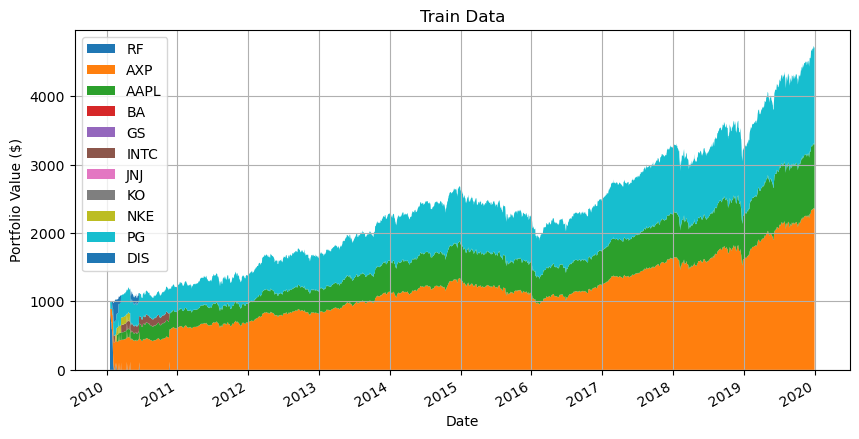

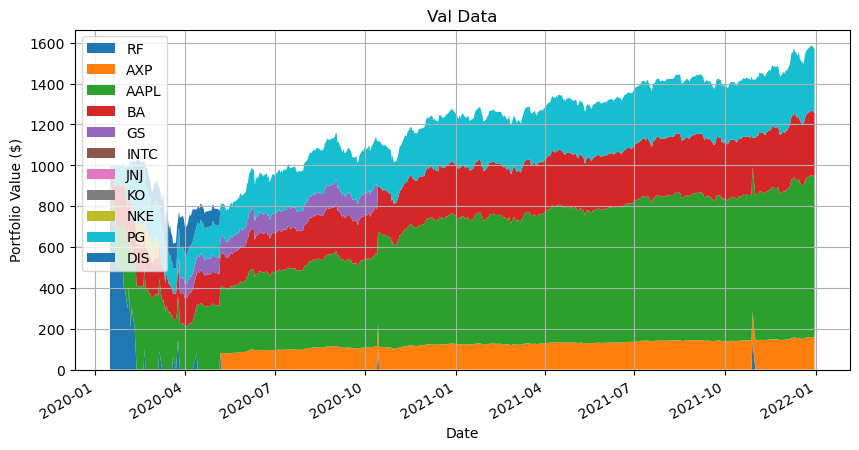

In [30]:

train_env_performance = PortfolioManagementEnv(
    train_df, 
    RETURN_COLS, 
    FEATURE_COLS, 
    window_size = 10,
    episode_length = -1
)

val_df = pd.read_csv('data\dow_10_returns_val.csv', index_col=0, parse_dates=True)
val_env = PortfolioManagementEnv(
    val_df, 
    RETURN_COLS, 
    FEATURE_COLS, 
    window_size = 10,
    episode_length = -1
)

evaluate_env(train_env_performance, 'Train Data')
print()
evaluate_env(val_env, 'Val Data')

## Compare and Save Results

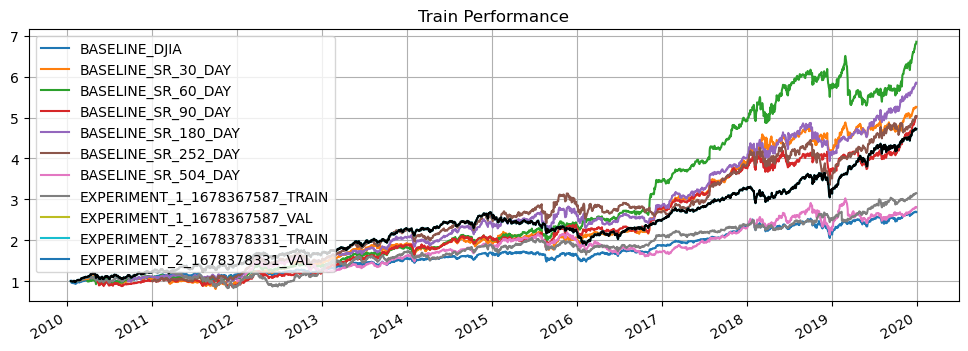

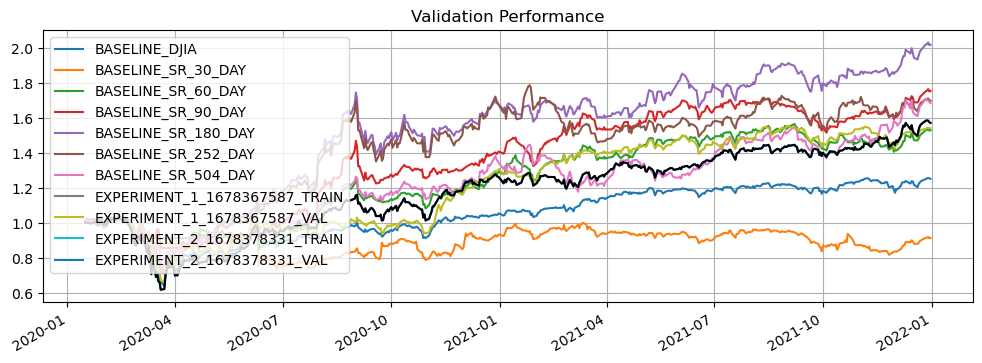

In [31]:
results_df = pd.read_csv('experiments/results_df.csv', index_col=0, parse_dates=True)
results_df[f'{experiment_id}_TRAIN'] = train_env_performance.get_portfolio_returns()
results_df[f'{experiment_id}_VAL'] = val_env.get_portfolio_returns()

(1+results_df[~results_df[f'{experiment_id}_TRAIN'].isna()]).cumprod().plot(title='Train Performance', figsize=(12,4));
(1+results_df[~results_df[f'{experiment_id}_TRAIN'].isna()])[f'{experiment_id}_TRAIN'].cumprod().plot(color='black', grid=True);

(1+results_df[~results_df[f'{experiment_id}_VAL'].isna()]).cumprod().plot(title='Validation Performance', figsize=(12,4));
(1+results_df[~results_df[f'{experiment_id}_VAL'].isna()])[f'{experiment_id}_VAL'].cumprod().plot(color='black', grid=True);

In [33]:
# results_df.to_csv('experiments/results_df.csv')